# Clustering Methods Exercises

## Introduction

This lab uses a dataset on wine quality. The data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

We will be using the chemical properties (i.e. everything but quality and color) to cluster the wine. Though this is unsupervised learning, there are interesting semi-supervised extensions relating clustering results onto color and quality.

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, os
os.chdir('D:\Data Science for Life Science\Machine Learning and Deep learning\Data')

#### Colorsetup
color setup is a hand-made module that contains different sets of colors. In the university's computers they may build their own color setup, here I make my own color setup

In [3]:
def colorsetup(darkness_level):
    """
    this function consists of 5 different colors with different brightness level
    """
    coloribm = {"Magenta 100":"2A0A16", "Magenta 90":"57002B", "Magenta 80":"760A3A", "Magenta 70":"A11950", "Magenta 60":"D12765", "Magenta 50":"EE538B", "Magenta 40":"FA75A6", "Magenta 30":"FFA0C2", "Magenta 20":"FFCFE1", "Magenta 10":"FFF0F6", "Purple 100":"1E1033", "Purple 90":"38146B", "Purple 80":"4F2196", "Purple 70":"6E32C9", "Purple 60":"8A3FFC", "Purple 50":"A66EFA", "Purple 40":"BB8EFF", "Purple 30":"D0B0FF", "Purple 20":"E6D6FF", "Purple 10":"F7F1FF", "Blue 100":"051243", "Blue 90":"061F80", "Blue 80":"0530AD", "Blue 70":"054ADA", "Blue 60":"0062FF", "Blue 50":"408BFC", "Blue 40":"6EA6FF", "Blue 30":"97C1FF", "Blue 20":"C9DEFF", "Blue 10":"EDF4FF", "Teal 100":"081A1C", "Teal 90":"003137", "Teal 80":"004548", "Teal 70":"006161", "Teal 60":"007D79", "Teal 50":"009C98", "Teal 40":"00BAB6", "Teal 30":"20D5D2", "Teal 20":"92EEEE", "Teal 10":"DBFBFB", "Gray 100":"171717", "Gray 90":"282828", "Gray 80":"3D3D3D", "Gray 70":"565656", "Gray 60":"6F6F6F", "Gray 50":"8C8C8C", "Gray 40":"A4A4A4", "Gray 30":"BEBEBE", "Gray 20":"DCDCDC", "Gray 10":"F3F3F3"} 
    colors = []
    colornum = darkness_level
    for i in [f'Blue {colornum}', f'Teal {colornum}', f'Magenta {colornum}', f'Purple {colornum}', f'Gray {colornum}']:
        colors.append(f'#{coloribm[i]}')

    sns.color_palette(colors)
    return colors

In [4]:
color = colorsetup(60)
sns.color_palette(color)

[(0.0, 0.3843137254901961, 1.0),
 (0.0, 0.49019607843137253, 0.4745098039215686),
 (0.8196078431372549, 0.15294117647058825, 0.396078431372549),
 (0.5411764705882353, 0.24705882352941178, 0.9882352941176471),
 (0.43529411764705883, 0.43529411764705883, 0.43529411764705883)]

## Question 1

* Import the data and examine the features. 
* Note which are continuous, categorical, and boolean. 
* How many entries are there for the two colors and range of qualities? 
* Make a histogram plot of the quality for each of the wine colors.

In [5]:
### BEGIN SOLUTION
# Import the data
data = pd.read_csv('Wine_Quality_Data.csv')

#transpose for readibility
data.head(4).T

0       1      2      3
fixed_acidity            7.4     7.8    7.8   11.2
volatile_acidity         0.7    0.88   0.76   0.28
citric_acid              0.0     0.0   0.04   0.56
residual_sugar           1.9     2.6    2.3    1.9
chlorides              0.076   0.098  0.092  0.075
free_sulfur_dioxide     11.0    25.0   15.0   17.0
total_sulfur_dioxide    34.0    67.0   54.0   60.0
density               0.9978  0.9968  0.997  0.998
pH                      3.51     3.2   3.26   3.16
sulphates               0.56    0.68   0.65   0.58
alcohol                  9.4     9.8    9.8    9.8
quality                    5       5      5      6
color                    red     red    red    red

In [6]:
data.shape

(6497, 13)

In [7]:
data['alcohol'].max()
# a strong wine!!

14.9

This dataset contains 13 variables and 6497 kinds of different wines.

The data types for each entry. The implementation of K-means in Scikit-learn is designed only to work with continuous data (even though it is sometimes used with categorical or boolean types). Fortunately, all the columns we will be using (everything except quality and color) are continuous.

In [8]:
# k-means can only work numerical
# This command can be used to find the types of different variables
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

The number of entries for each wine color.

In [9]:
#check balans in perentage using value_counts and normalize =True
data.color.value_counts(normalize=True)

white    0.753886
red      0.246114
Name: color, dtype: float64

The distribution of quality values.

In [10]:
#check quality score distribution 
#majority around 5,6,7
data.quality.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

Now for the histogram.

In [11]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

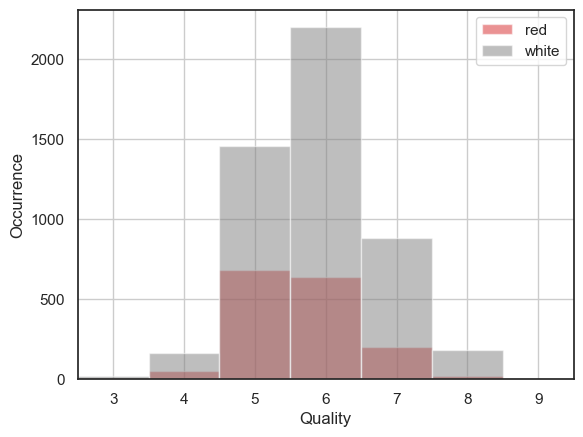

In [12]:
# seaborn styles
sns.set_context('notebook')
sns.set_style('white')

# custom colors using sns palette
red = sns.color_palette()[3]
white = sns.color_palette()[7]

# set bins for histogram, make sure there is a bin for every quality range
bin_range = np.array([3, 4, 5, 6, 7, 8, 9])

# plot histogram of quality counts for red and white wines
# initiate axes
ax = plt.axes()
for color, plot_color in zip(['red', 'white'], [red, white]):
    
    # parsing two columns of the data
    q_data = data.loc[data.color==color, 'quality']
    q_data.hist(bins=bin_range, 
                alpha=0.5, ax=ax, 
                color=plot_color, label=color)
    

ax.legend()
ax.set(xlabel='Quality', ylabel='Occurrence')

# force tick labels to be in middle of region
ax.set_xlim(3,10)
ax.set_xticks(bin_range+0.5)
ax.set_xticklabels(bin_range);
ax.grid('off')
### END SOLUTION

In [13]:
# this table shows that these two class of wine are completely different from each other
data.copy().groupby('color').mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
color                                                                 
red         8.319637          0.527821     0.270976        2.538806   
white       6.854788          0.278241     0.334192        6.391415   

       chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
color                                                                   
red     0.087467            15.874922             46.467792  0.996747   
white   0.045772            35.308085            138.360657  0.994027   

             pH  sulphates    alcohol   quality  
color                                            
red    3.311113   0.658149  10.422983  5.636023  
white  3.188267   0.489847  10.514267  5.877909

In [14]:
# somewhat normal distribution, white wine a bit higher then red wine
data.copy().groupby('color').mean()['quality']

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

## Question 2

if we use distance, it is most important that each of our features are going to bwe on the same scale. We do not want favor a feature because of further distance than the other one. We are interested in the variation, rather then the actual values

* Examine the correlation and skew of the relevant variables--everything except color and quality (without dropping these columns from our data).
* Perform any appropriate feature transformations and/or scaling.
* Examine the pairwise distribution of the variables with pairplots to verify scaling and normalization efforts.


In [15]:
### BEGIN SOLUTION
# it is equal to data.columns[:-2]
float_columns = [x for x in data.columns if x not in ['color', 'quality']]

# The correlation matrix
corr_mat = data[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              0.000000          0.219008     0.324436   
volatile_acidity           0.219008          0.000000    -0.377981   
citric_acid                0.324436         -0.377981     0.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity              -0.111981   0.298195            -0.282735   
volatile_acidity           -0.196011   0.377124            -0.352557   
citric_acid                 0.142451   0.038998             0.133126   
residual_sugar              0.000000  -0.128940             0.402871   
chlorides                  -0.128940   0.000000            -0.195045   
free_sulfur_dioxide         0.402871  -0.195045             0.000000   
total_sulfur_dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile_acidity                 -0.414476  0.271296  0.261454   0.225984   
citric_acid                       0.195242  0.096154 -0.329808   0.056197   
residual_sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free_sulfur_dioxide               0.720934  0.025717 -0.145854  -0.188457   
total_sulfur_dioxide              0.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  0.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  0.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   0.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   

                       alcohol  
fixed_acidity        -0.095452  
volatile_acidity     -0.037640  
citric_acid          -0.010493  
residual_sugar       -0.359415  
chlorides            -0.256916  
free_sulfur_dioxide  -0.179838  
total_sulfur_dioxide -0.265740  
density              -0.686745  
pH                    0.121248  
sulphates            -0.003029  
alcohol               0.000000

In [16]:
# see which features are highly correlated
# Pairwise maximal correlations
# idxmax(): Return index of first occurrence of maximum over requested axis.
# idxmin(): Return index of first occurrence of minimum over requested axis.
corr_mat.abs().idxmax()

fixed_acidity                        density
volatile_acidity        total_sulfur_dioxide
citric_acid                 volatile_acidity
residual_sugar                       density
chlorides                          sulphates
free_sulfur_dioxide     total_sulfur_dioxide
total_sulfur_dioxide     free_sulfur_dioxide
density                              alcohol
pH                               citric_acid
sulphates                          chlorides
alcohol                              density
dtype: object

In [17]:
# how much are they correlated? Can we eliminate certain features based on high correlations
corr_mat.abs().max()

fixed_acidity           0.458910
volatile_acidity        0.414476
citric_acid             0.377981
residual_sugar          0.552517
chlorides               0.395593
free_sulfur_dioxide     0.720934
total_sulfur_dioxide    0.720934
density                 0.686745
pH                      0.329808
sulphates               0.395593
alcohol                 0.686745
dtype: float64

And an examination of the skew values in anticipation of transformations.

Pandas dataframe.skew() function return unbiased skew over requested axis Normalized by N-1. Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 

https://www.geeksforgeeks.org/python-pandas-dataframe-skew/

In [18]:
# .skew 0: no skew, + right skew, - left skew, look for above .75 
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

chlorides              5.399828
sulphates              1.797270
fixed_acidity          1.723290
volatile_acidity       1.495097
residual_sugar         1.435404
free_sulfur_dioxide    1.220066
dtype: float64

In [19]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():

    # log1p= Return the natural logarithm of one plus the input array, element-wise.
    data[col] = np.log1p(data[col])

# I think they did this to reduce the difference between skewness of the columns


Perform feature scaling.

Perform feature scaling.

The standard score of a sample x is calculated as:

    z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])

data.head(4)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.229509          2.135767    -2.192833       -0.815173   0.624554   
1       0.550261          3.012817    -2.192833       -0.498175   1.281999   
2       0.550261          2.438032    -1.917553       -0.625740   1.104012   
3       2.802728         -0.337109     1.661085       -0.815173   0.594352   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.193601             -1.446359  1.034993  1.813090   0.250355   
1            -0.013944             -0.862469  0.701486 -0.115073   1.059213   
2            -0.754684             -1.092486  0.768188  0.258120   0.862549   
3            -0.574982             -0.986324  1.101694 -0.363868   0.389396   

    alcohol  quality color  
0 -0.915464        5   red  
1 -0.580068        5   red  
2 -0.580068        5   red  
3 -0.580068        6   red

Finally, the pairplot of the transformed and scaled features.

c:\Anaconda3\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
c:\Anaconda3\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)
c:\Anaconda3\lib\site-packages\seaborn\relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

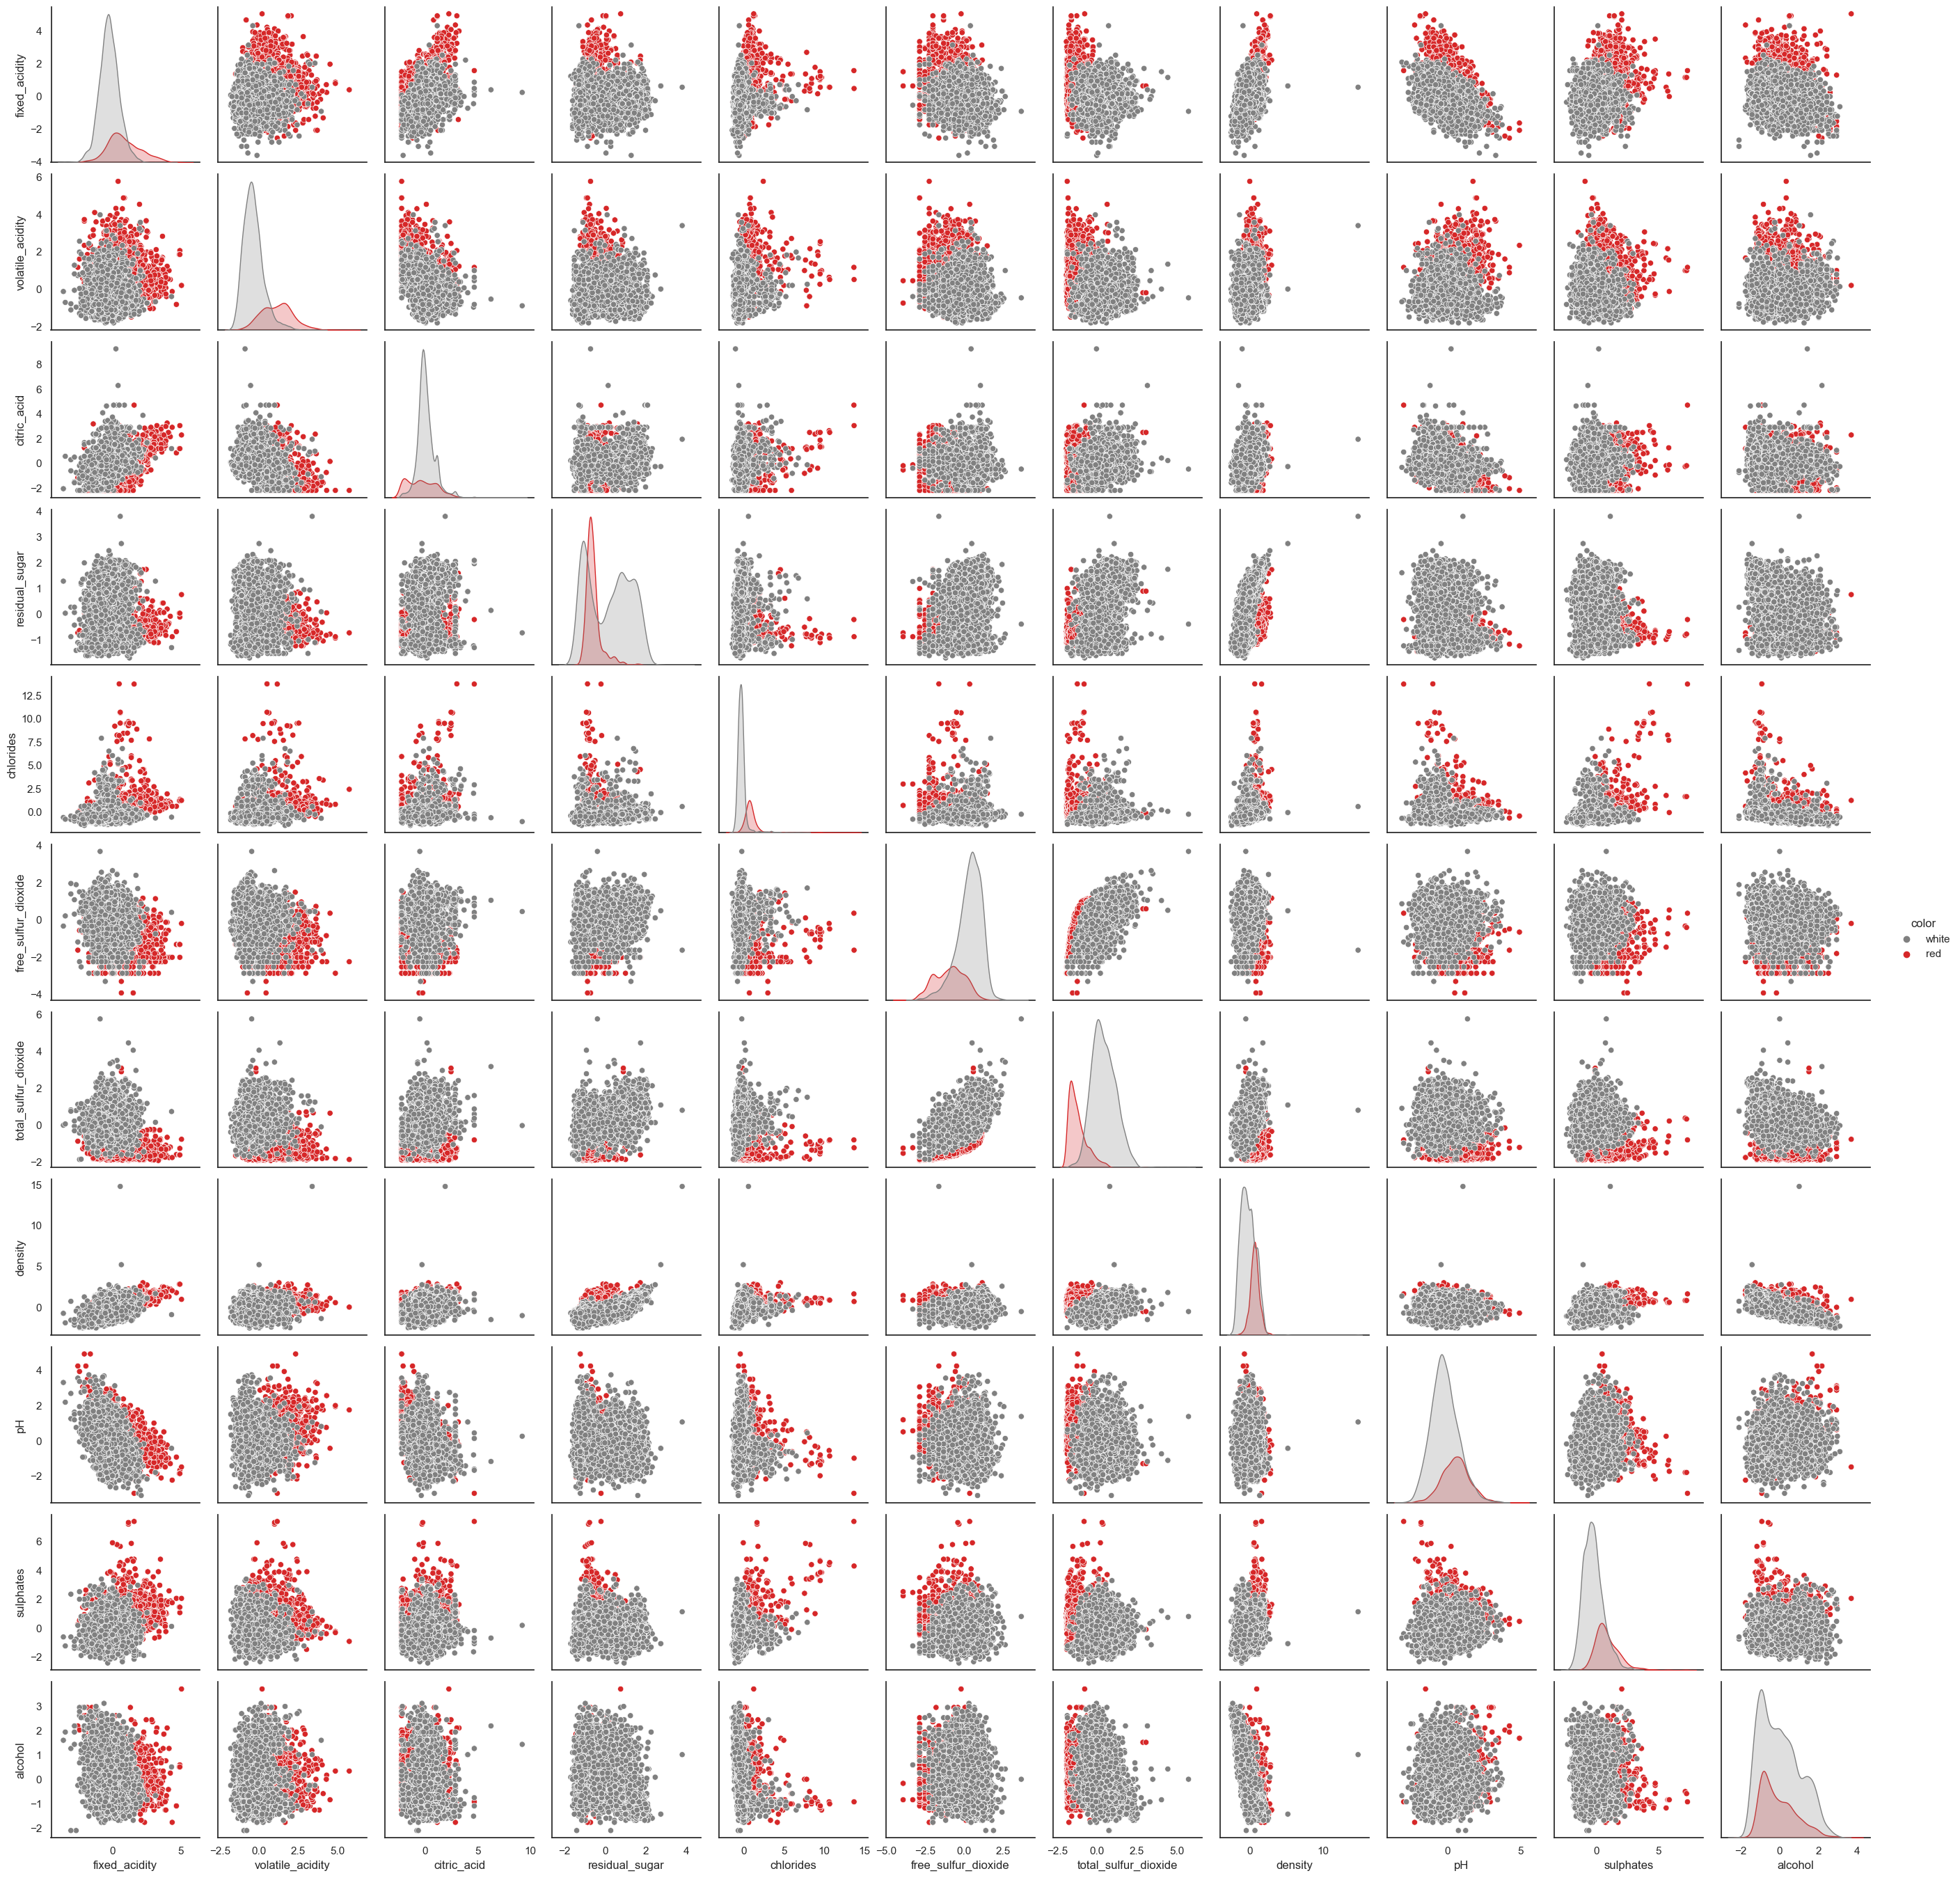

In [21]:
sns.set_context('notebook')
sns.pairplot(data[float_columns + ['color']], 
             hue='color', 
             hue_order=['white', 'red'],
             palette={'red':red, 'white':'gray'});
### END SOLUTION

We can see some distinghion on the data, could be good for classification

Now we will use k-means with two clusters without the use of the class label column

## Question 3

* Fit a K-means clustering model with two clusters.
* Examine the clusters by counting the number of red and white wines in each cluster.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict

In [22]:
from sklearn.cluster import KMeans
### BEGIN SOLUTION
# random state: Determines random number generation for centroid initialization. Use an int to make the randomness deterministic
km = KMeans(n_clusters=2, random_state=42)
# Compute k-means clustering. Training instances to cluster.
km = km.fit(data[float_columns]) # not including quality or color columns

# Predict the closest cluster each sample in X belongs to. New data to predict.
data['kmeans'] = km.predict(data[float_columns]) #create a new column with result

In [23]:
data.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [24]:
data.kmeans.value_counts()

1    4834
0    1663
Name: kmeans, dtype: int64

In [25]:
data.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.229509          2.135767    -2.192833       -0.815173   0.624554   
1       0.550261          3.012817    -2.192833       -0.498175   1.281999   
2       0.550261          2.438032    -1.917553       -0.625740   1.104012   
3       2.802728         -0.337109     1.661085       -0.815173   0.594352   
4       0.229509          2.135767    -2.192833       -0.815173   0.624554   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.193601             -1.446359  1.034993  1.813090   0.250355   
1            -0.013944             -0.862469  0.701486 -0.115073   1.059213   
2            -0.754684             -1.092486  0.768188  0.258120   0.862549   
3            -0.574982             -0.986324  1.101694 -0.363868   0.389396   
4            -1.193601             -1.446359  1.034993  1.813090   0.250355   

    alcohol  quality color  kmeans  
0 -0.915464        5   red       0  
1 -0.580068        5   red       0  
2 -0.580068        5   red       0  
3 -0.580068        6   red       0  
4 -0.915464        5   red       0

In [26]:
#check how it is fit
(data[['color','kmeans']]
 .groupby(['kmeans','color'])
 .size()
 .to_frame() #to change to dataframe
 .rename(columns={0:'number'}))
### END SOLUTION

number
kmeans color        
0      red      1576
       white      87
1      red        23
       white    4811

## Question 4

* Now fit K-Means models with cluster values ranging from 1 to 20.
* For each model, store the number of clusters and the inertia value. 
* Plot cluster number vs inertia. Does there appear to be an ideal cluster number?

In [27]:
### BEGIN SOLUTION
# Create and fit a range of models store cluster numbers, inertia and model is series object
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data[float_columns])

    # inertia_: Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))

In [28]:
km_list[:3]

[clusters                                        1
 inertia                                   71467.0
 model       KMeans(n_clusters=1, random_state=42)
 dtype: object,
 clusters                                        2
 inertia                              55455.964329
 model       KMeans(n_clusters=2, random_state=42)
 dtype: object,
 clusters                                        3
 inertia                              45199.883382
 model       KMeans(n_clusters=3, random_state=42)
 dtype: object]

c:\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


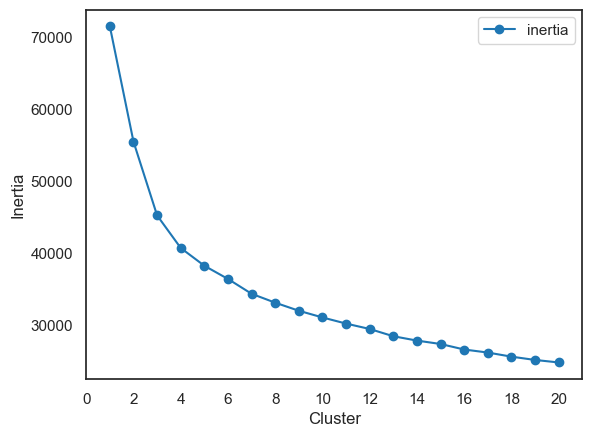

In [29]:
# extract inertia amounts based on cluster number
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel='Inertia');
### END SOLUTION

It does show a bit of an elbow point at 4, but if we want to seperate on color or quality we either choose 2 or 6

## Question 5

* Fit an agglomerative clustering model with two clusters.
* Compare the results to those obtained by K-means with regards to wine color by reporting the number of red and white observations in each cluster for both K-means and agglomerative clustering.
* Visualize the dendrogram produced by agglomerative clustering. *Hint:* SciPy has a module called [`cluster.hierarchy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy) that contains the `linkage` and `dendrogram` functions required to create the linkage map and plot the resulting dendrogram.

In [30]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
# either set number of clusters or distance metric
ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
# train the model
ag = ag.fit(data[float_columns])
# predict by using the model
data['agglom'] = ag.fit_predict(data[float_columns])

In [31]:
data['agglom'].value_counts()

0    4786
1    1711
Name: agglom, dtype: int64

Note that cluster assignment is arbitrary, the respective primary cluster numbers for red and white may not be identical to the ones below and also may not be the same for both K-means and agglomerative clustering.

In [32]:
# First, for Agglomerative Clustering:
(data[['color','agglom','kmeans']]
 .groupby(['color','agglom'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color agglom        
red   0           31
      1         1568
white 0         4755
      1          143

In [33]:
# Comparing with KMeans results:
(data[['color','agglom','kmeans']]
 .groupby(['color','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color kmeans        
red   0         1576
      1           23
white 0           87
      1         4811

In [34]:
# Comparing results:
(data[['color','agglom','kmeans']]
 .groupby(['color','agglom','kmeans'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
color agglom kmeans        
red   0      0           13
             1           18
      1      0         1563
             1            5
white 0      0           38
             1         4717
      1      0           49
             1           94

Though the cluster numbers are not identical, the clusters are very consistent within a single wine variety (red or white).

And here is a plot of the dendrogram created from agglomerative clustering.

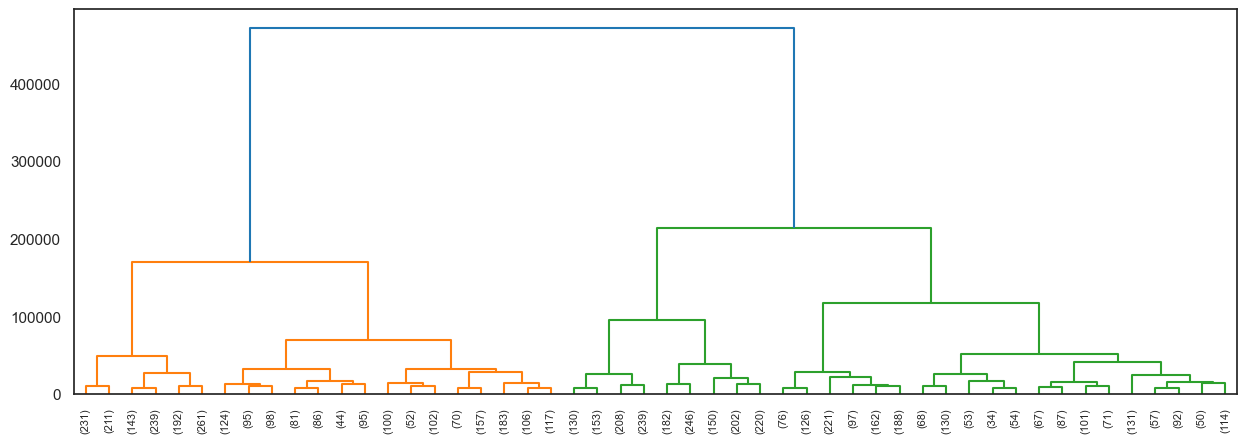

In [35]:
# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
from scipy.cluster import hierarchy
# The children of each non-leaf node. Values less than n_samples correspond to leaves of the tree which are the original samples.
Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color setup
red = color[2]
blue = color[0]

hierarchy.set_link_color_palette(None)

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=50, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax)
### END SOLUTION

## Question 6

In this question, we are going to explore clustering as a form of feature engineering.

* Create a **binary** target variable `y`, denoting if the quality is greater than 7 or not.
* Create a variable called `X_with_kmeans` from `data`, by dropping the columns "quality", "color" and "agglom" from the dataset. Create `X_without_kmeans` from that by dropping "kmeans".
* For both datasets, using __[StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)__ with 10 splits, fit 10 Random Forest Classifiers and find the mean of the ROC-AUC scores from these 10 classifiers.
* Compare the average roc-auc scores for both models, the one using the KMeans cluster as a feature and the one that doesn't use it.

#### Stratified ShuffleSplit cross-validator

Provides train/test indices to split data in train/test sets.

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

Note: like the ShuffleSplit strategy, stratified random splits do not guarantee that all folds will be different, although this is still very likely for sizeable datasets. 
StratifiedShuffleSplit is a variation of ShuffleSplit, which returns stratified splits, i.e which creates splits by preserving the same percentage for each target class as in the complete set.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

#### RandomForestClassifier
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### AUC-ROC
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1). Figure 5. AUC (Area under the ROC Curve). AUC provides an aggregate measure of performance across all possible classification thresholds.

#### ROC
A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The method was originally developed for operators of military radar receivers starting in 1941, which led to its name.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection. The false-positive rate is also known as probability of false alarm and can be calculated as (1 − specificity).

https://en.wikipedia.org/wiki/Receiver_operating_characteristic

#### LogisticRegression
This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. Note that regularization is applied by default. It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance; any other input format will be converted (and copied).

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

### BEGIN SOLUTION
y = (data['quality'] > 7).astype(int) # this is a series of 0 and 1 that yi=1 if the quality factor is more than 7; otherwise, yi=0
# drop the requested columns
X_with_kmeans = data.drop(['agglom', 'color', 'quality'], axis=1)
X_without_kmeans = X_with_kmeans.drop('kmeans', axis=1)
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    # loop to 10 batches
    # Generate indices to split data into training and test set.
    for train_index, test_index in sss.split(X, y):   
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # put the training material into estimator
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)
# return classification_report(y_test, y_predicted)

estimator = RandomForestClassifier()
roc_with_kmeans = get_avg_roc_10splits(estimator, X_with_kmeans, y)
roc_without_kmeans = get_avg_roc_10splits(estimator, X_without_kmeans, y)
print("Without kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_without_kmeans))
print("Using kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_kmeans))

Without kmeans cluster as input to Random Forest, roc-auc is "0.9059523809523808"
Using kmeans cluster as input to Random Forest, roc-auc is "0.9085714285714286"


Conclusuion: the dataset with k-means collumn performs better then the data without

Let's now explore if the number of clusters have an effect in this improvement.

* Create the basis training set from `data` by restricting to float_columns.
* For $n = 1, \ldots, 20$, fit a KMeans algorithim with $n$ clusters. __[One-hot encode]()__ it and add it to the **basis** training set. Don't add it to the previous iteration.
* Fit 10 **Logistic Regression** models and compute the average roc-auc-score.
* Plot the average roc-auc scores.

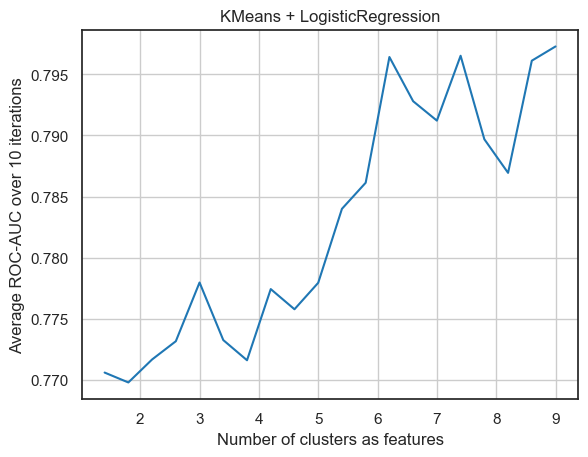

In [41]:
from sklearn.linear_model import LogisticRegression

X_basis = data[float_columns]
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

def create_kmeans_columns(n):
    km = KMeans(n_clusters=n)
    km.fit(X_basis)
    km_col = pd.Series(km.predict(X_basis))
    km_cols = pd.get_dummies(km_col, prefix='kmeans_cluster')
    return pd.concat([X_basis, km_cols], axis=1)

estimator = LogisticRegression()
ns = range(1, 21)
roc_auc_list = [get_avg_roc_10splits(estimator, create_kmeans_columns(n), y)
                for n in ns]

ax = plt.axes()
ax.plot(ns, roc_auc_list)
ax.set(
    xticklabels= ns,
    xlabel='Number of clusters as features',
    ylabel='Average ROC-AUC over 10 iterations',
    title='KMeans + LogisticRegression'
)
ax.grid(True)
### END SOLUTION

we can see that the best ROC-AUC score belongs to 5 or 6 clusters. they are the best number of clusters that we can have in this dataset. probably it shows that we can cluster our data set based on its quality rather than its color.

---
### Machine Learning Foundation (C) 2020 IBM Corporation